In [5]:
%matplotlib inline
# general libraries
import sys
import math
import collections
from pylab import MaxNLocator
from collections import defaultdict
import seaborn as sns # For data visualization and specifically for pairplot()
import matplotlib.pyplot as plt # For data visualization

# pandas libraries
import pandas as pd
from pandas import DataFrame
from pandas.testing import assert_frame_equal

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# numpy libraries
import numpy as np
from numpy import std
from numpy import mean
from numpy import percentile

# scipy libraries
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import normaltest
from scipy.spatial.distance import pdist,squareform

# sklearn libraries
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer  # explicitly require this experimental feature
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler # To transform the dataset
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning
import matplotlib.pyplot as plt

In [6]:
data_directory = (r'C:\Users\jigok\OneDrive\Desktop\UniPISA\1semestre1Anno\Data Mining\Progetto\DatasetProject1')
plot_directory = "../../plots/data_understanding/"
TR_file = data_directory + '\\Numerical_Normalized_Train_HR_Employee_Attrition.csv'
TS_file = data_directory + "Test_HR_Employee_Attrition.csv"

In [7]:
df = pd.read_csv(TR_file, sep=",")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   Attrition              883 non-null    float64
 10  OverTime               883 non-null    float64
 11  OverallSatisfaction    883 non-null    float64
 12  JobLevel               883 non-null    float64
 13  NumCompaniesWorked     883 non-null    float64
 14  Education              883 non-null    float64
dtypes: flo

In [9]:
df.describe()

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
count  883.000000        883.000000     883.000000         883.000000   
mean     0.441784          0.292914       0.227927           0.300518   
std      0.196813          0.294351       0.209842           0.256381   
min      0.000000          0.000000       0.000000           0.000000   
25%      0.285714          0.035714       0.079383           0.071429   
50%      0.404762          0.214286       0.156611           0.214286   
75%      0.571429          0.464286       0.301351           0.500000   
max      1.000000          1.000000       1.000000           1.000000   

       StockOptionLevel  TrainingTimesLastYear  YearsAtCompany  \
count        883.000000             883.000000      883.000000   
mean           0.264628               0.444319        0.316308   
std            0.288454               0.197971        0.226178   
min            0.000000               0.000000        0.000000   
25%            0.000000               0.333333        0.150000   
50%            0.333333               0.333333        0.250000   
75%            0.333333               0.500000        0.450000   
max            1.000000               1.000000        1.000000   

       YearsInCurrentRole  MonthlyHours   Attrition    OverTime  \
count          883.000000    883.000000  883.000000  883.000000   
mean             0.244975      0.368545    0.173273    0.277463   
std              0.214712      0.230461    0.378698    0.448001   
min              0.000000      0.000000    0.000000    0.000000   
25%              0.125000      0.185135    0.000000    0.000000   
50%              0.187500      0.329663    0.000000    0.000000   
75%              0.437500      0.502469    0.000000    1.000000   
max              1.000000      1.000000    1.000000    1.000000   

       OverallSatisfaction    JobLevel  NumCompaniesWorked   Education  
count           883.000000  883.000000          883.000000  883.000000  
mean              0.440921    0.229898            0.315213    0.471687  
std               0.178532    0.251877            0.276110    0.252071  
min               0.000000    0.000000            0.000000    0.000000  
25%               0.333333    0.000000            0.111111    0.250000  
50%               0.333333    0.250000            0.222222    0.500000  
75%               0.666667    0.250000            0.444444    0.750000  
max               1.000000    1.000000            1.000000    1.000000

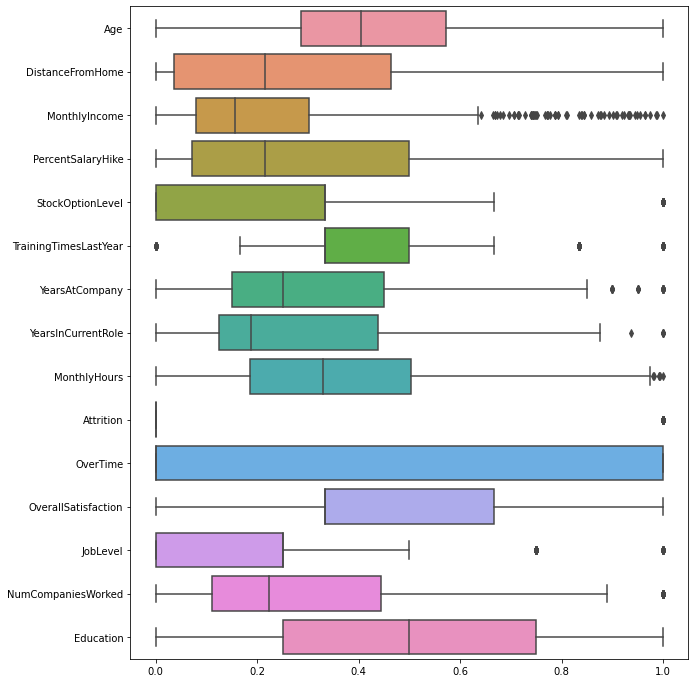

In [10]:
plt.figure(figsize = (10,12))
sns.boxplot(data = df, orient = "h")
plt.show()

Semplifichiamo il numero dei cluster e selezioniamo quelli più rilevanti:

In [11]:
to_drop =['PercentSalaryHike','StockOptionLevel','TrainingTimesLastYear','Attrition','OverTime','OverallSatisfaction',
         'JobLevel','NumCompaniesWorked','Education']

# drop features 
for column_name in to_drop:
    del df[column_name]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 883 non-null    float64
 1   DistanceFromHome    883 non-null    float64
 2   MonthlyIncome       883 non-null    float64
 3   YearsAtCompany      883 non-null    float64
 4   YearsInCurrentRole  883 non-null    float64
 5   MonthlyHours        883 non-null    float64
dtypes: float64(6)
memory usage: 41.5 KB


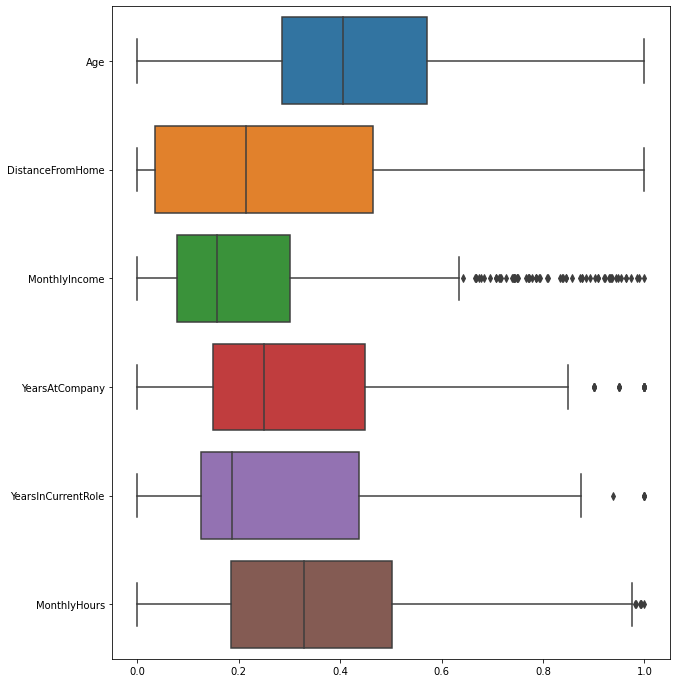

In [13]:
plt.figure(figsize = (10,12))
sns.boxplot(data = df, orient = "h")
plt.show()

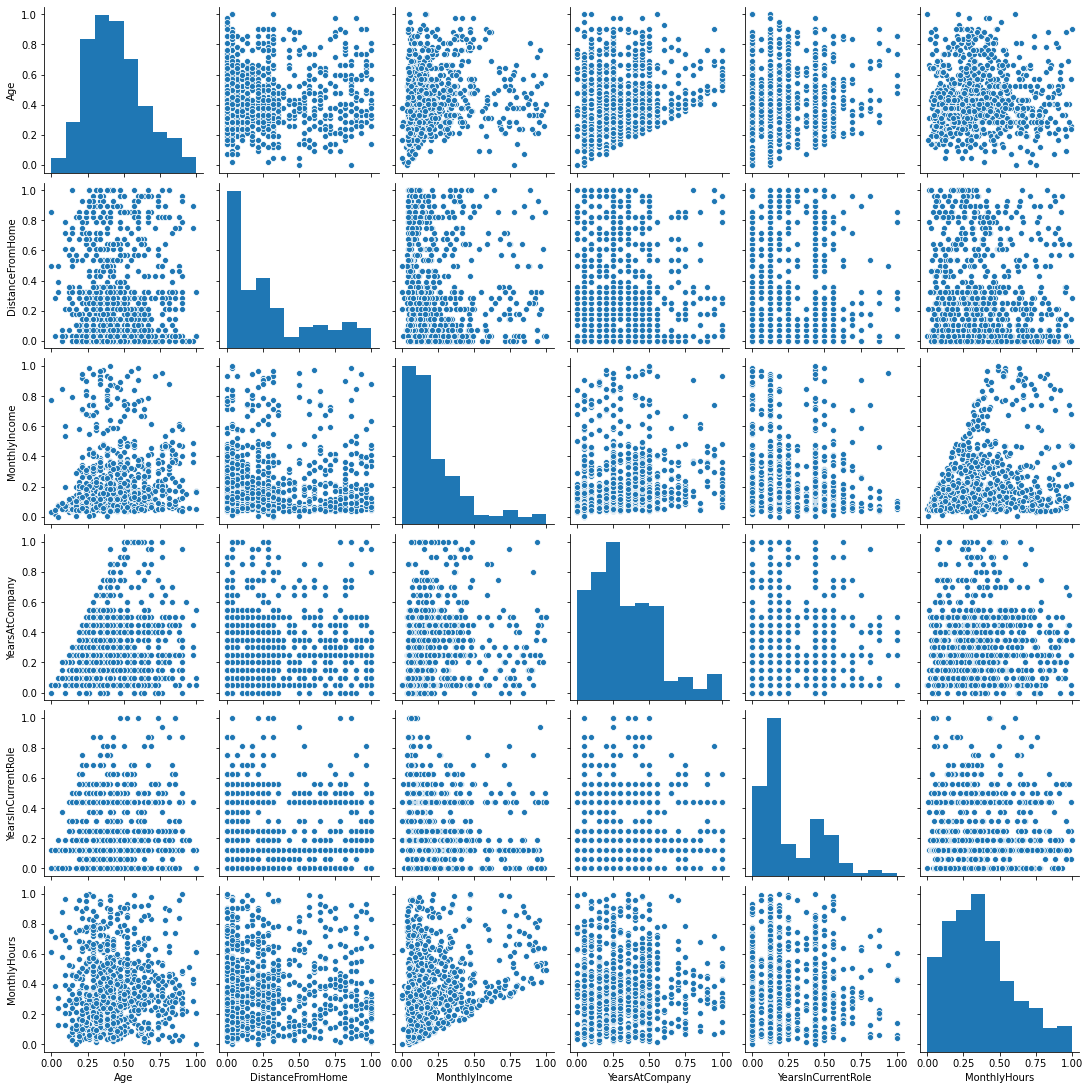

In [14]:
sns.pairplot(df, palette = "Accent")
plt.show()

# DBSCAN

Il DBSCAN è un algoritmo di clustering che fa parte della categoria dei cosiddetti density-based perchè non fa altro che individuare zone dello spazio delle feature in cui la densità dei punti (o osservazioni) è maggiore.

Tutte quelle osservazioni vicine tra loro vengono raggruppate in un cluster. Quelle che invece sembrano isolate sono etichettate come noise o rumore.

Il DBSCAN necessita di due iperparametri:

ε : che corrisponde alla distanza all'interno della quale ricercare punti vicini
n : che corrisponde al numero minimo di punti affinchè si formi un cluster
Per brevità possiamo dire che il DBSCAN non fa altro che cercare tutti quei cluster i cui punti sono un numero maggiore o uguale adne distanti tra loro meno di ε.

Adesso che abbiamo capito cosa fa il DBSCAN possiamo istanziare il modello tramite sklearn. Per scopi dimostrativi in queste prime righe proviamo due iperparametri ε encasuali:

In [15]:
# Compute DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(df)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 485


L'algoritmo ha identificato 6 cluster (0,1,2,3,4,5) e alcuni noise points (-1),ecco le etichette dei cluster identificati:

In [16]:
dbscan.labels_

array([-1,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  1, -1,
       -1,  0, -1,  0, -1,  0,  3,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,
        0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1,  5, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0, -1, -1,
        0,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0, -1,  0, -1, -1,  0, -1,
       -1,  0, -1, -1,  0, -1,  0, -1, -1,  0,  2,  0, -1,  0, -1, -1,  0,
       -1,  0,  0, -1, -1, -1,  0, -1, -1,  4,  0, -1, -1,  0, -1, -1,  0,
       -1, -1, -1,  5,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,
        0,  0, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1,
       -1,  0,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0,  0,
       -1,  0, -1, -1,  0,  0,  0, -1,  0, -1, -1, -1,  0, -1, -1,  0,  0,
        0, -1, -1,  0, -1,  0, -1, -1,  0,  0, -1, -1,  0, -1,  0, -1, -1,
       -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1, -1,
       -1,  3, -1,  0,  0

In [17]:
np.unique(dbscan.labels_,return_counts = True)

(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64),
 array([485, 366,   5,  11,   5,   5,   6], dtype=int64))

E mostrando le prime 15 righe del dataset possiamo vedere i cluster assegnati alle osservazioni (colonna LABEL):

In [18]:
df["LABEL"] = labels

In [19]:
df.head(15)

Age  DistanceFromHome  MonthlyIncome  YearsAtCompany  \
0   0.809524          0.285714       0.286171            0.40   
1   0.428571          0.000000       0.147183            0.05   
2   0.166667          0.535714       0.144644            0.05   
3   0.357143          0.142857       0.068878            0.15   
4   0.309524          0.285714       0.204325            0.50   
5   0.404762          0.214286       0.048484            0.05   
6   0.214286          0.107143       0.296945            0.45   
7   0.119048          0.071429       0.030052            0.05   
8   0.571429          0.571429       0.091042            0.15   
9   0.404762          1.000000       0.064684            0.05   
10  0.500000          0.142857       0.079267            0.50   
11  0.976190          0.892857       0.489341            0.25   
12  0.380952          0.392857       0.038441            0.05   
13  0.404762          0.000000       0.588079            0.65   
14  0.452381          0.107143       0.094005            0.25   

    YearsInCurrentRole  MonthlyHours  LABEL  
0               0.4375      0.231122     -1  
1               0.5000      0.233476      0  
2               0.3125      0.747017     -1  
3               0.4375      0.435214      0  
4               0.1250      0.142192      0  
5               0.1250      0.442950      0  
6               0.1875      0.617375      0  
7               0.3125      0.369579     -1  
8               0.1250      0.450738     -1  
9               0.5000      0.167150     -1  
10              0.6250      0.174780     -1  
11              0.1250      0.408468     -1  
12              0.1250      0.264170      0  
13              0.7500      0.314387     -1  
14              0.1250      0.137891      0

Proviamo a mostrare degli scatterplot tra alcune variabili utilizzando matplotlib e seaborn

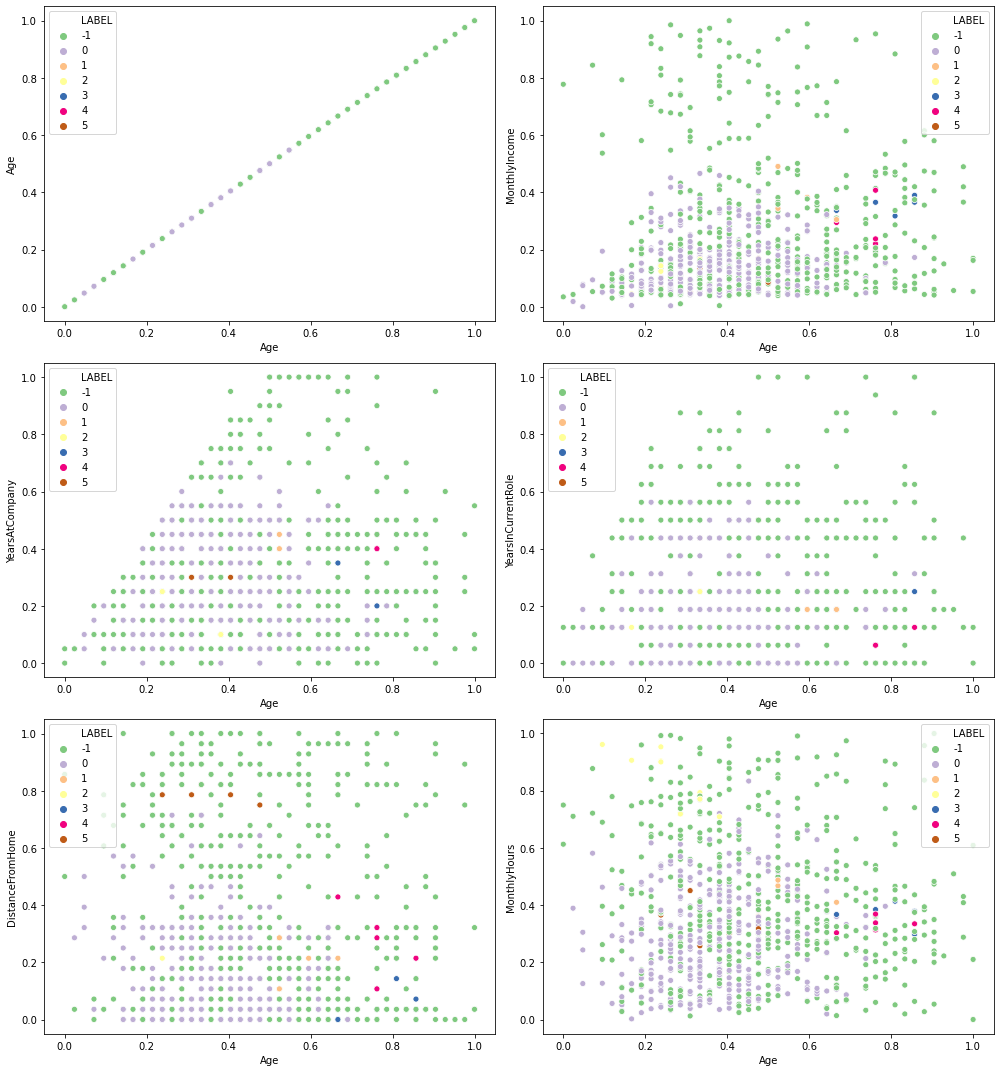

In [39]:
fig, ((ax1, ax2), (ax3, ax4),( ax5, ax6)) = plt.subplots(3, 2, figsize = (14,15))

sns.scatterplot(x = "Age", y = "MonthlyHours", data = df, hue = "LABEL", palette = "Accent", ax = ax6)
sns.scatterplot(x = "Age", y = "MonthlyIncome", data = df, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "Age", y = "YearsAtCompany", data = df, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "Age", y = "YearsInCurrentRole", data = df, hue = "LABEL", palette = "Accent", ax = ax4)
sns.scatterplot(x = "Age", y = "DistanceFromHome", data = df, hue = "LABEL", palette = "Accent", ax = ax5)
sns.scatterplot(x = "Age", y = "Age", data = df, hue = "LABEL", palette = "Accent", ax = ax1)

plt.tight_layout()
plt.show()

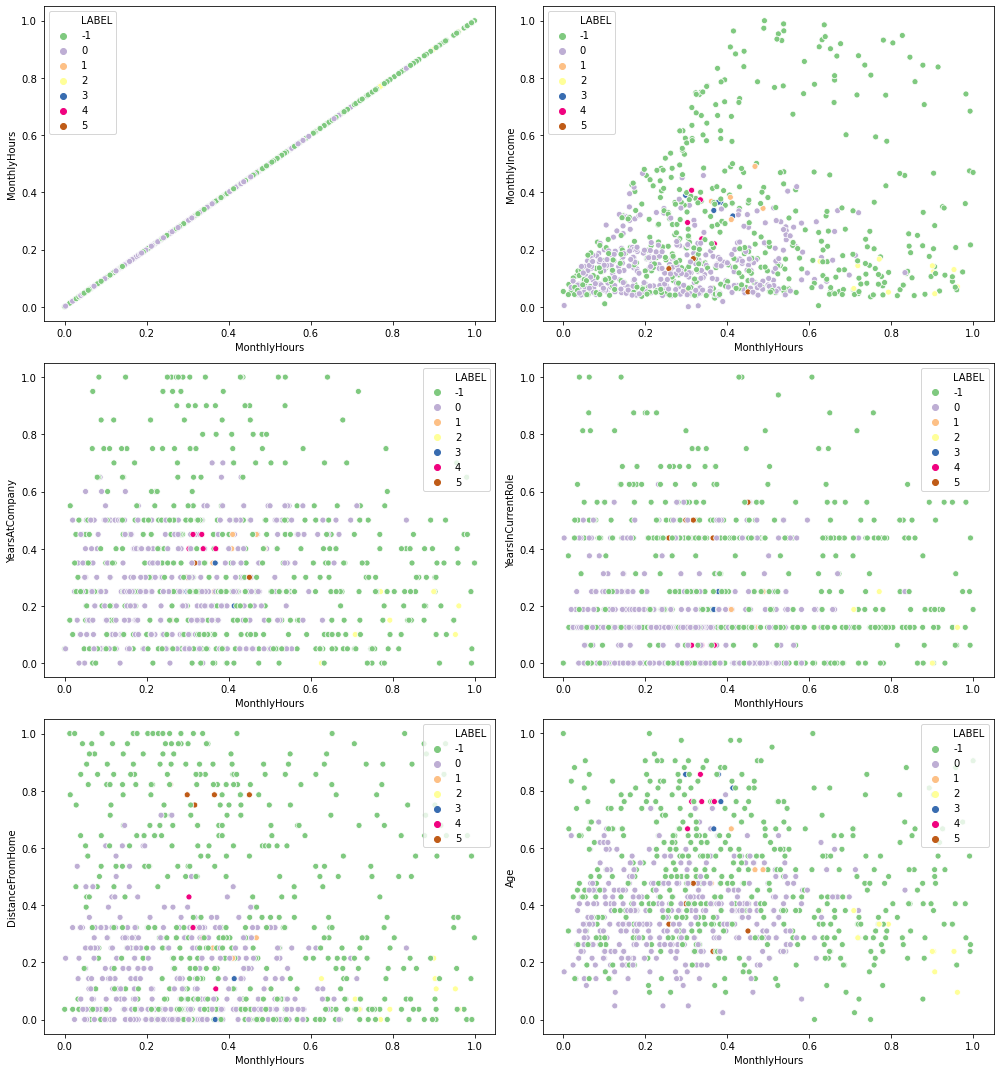

In [40]:
fig, ((ax1, ax2), (ax3, ax4),( ax5, ax6)) = plt.subplots(3, 2, figsize = (14,15))

sns.scatterplot(x = "MonthlyHours", y = "MonthlyHours", data = df, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "MonthlyHours", y = "MonthlyIncome", data = df, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "MonthlyHours", y = "YearsAtCompany", data = df, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "MonthlyHours", y = "YearsInCurrentRole", data = df, hue = "LABEL", palette = "Accent", ax = ax4)
sns.scatterplot(x = "MonthlyHours", y = "DistanceFromHome", data = df, hue = "LABEL", palette = "Accent", ax = ax5)
sns.scatterplot(x = "MonthlyHours", y = "Age", data = df, hue = "LABEL", palette = "Accent", ax = ax6)

plt.tight_layout()
plt.show()

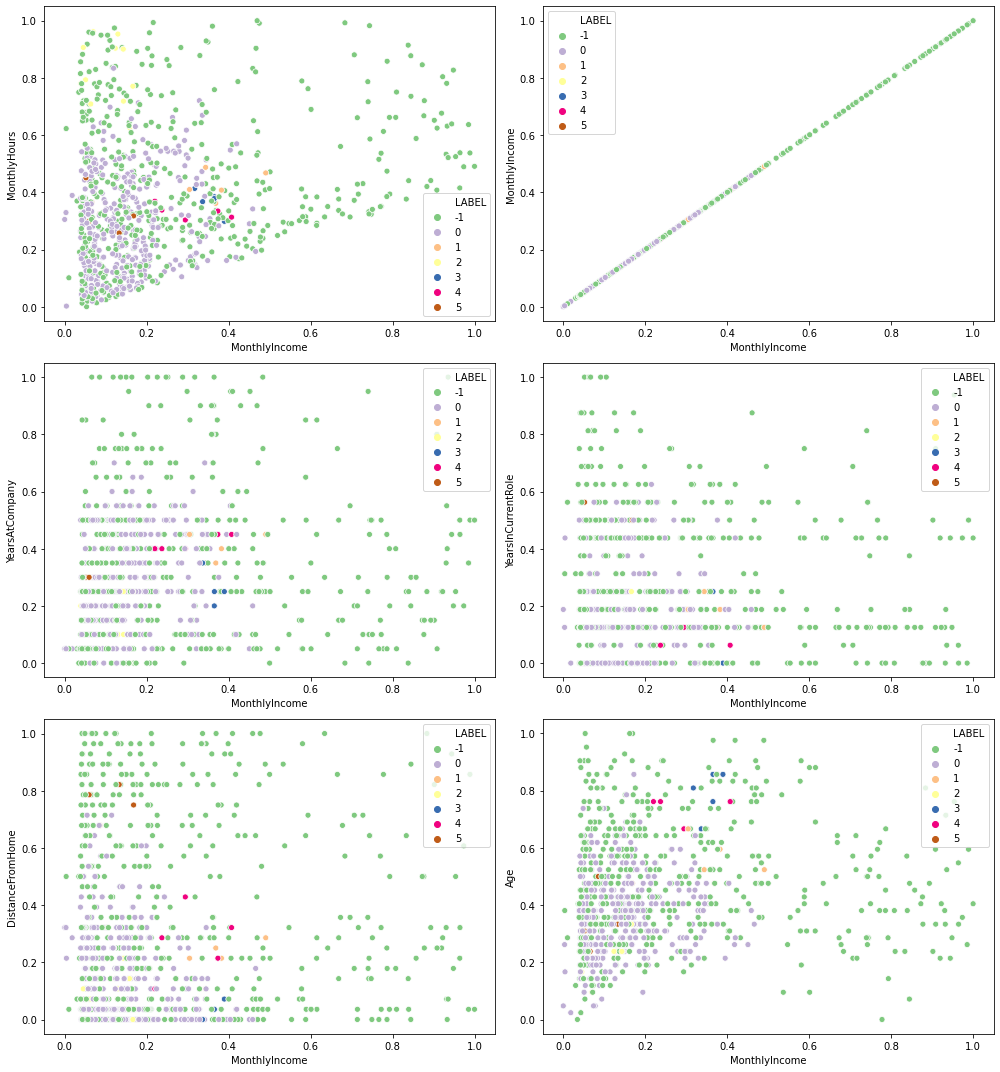

In [44]:
fig, ((ax1, ax2), (ax3, ax4),( ax5, ax6)) = plt.subplots(3, 2, figsize = (14,15))

sns.scatterplot(x = "MonthlyIncome", y = "MonthlyHours", data = df, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "MonthlyIncome", y = "MonthlyIncome", data = df, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "MonthlyIncome", y = "YearsAtCompany",data = df, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "MonthlyIncome", y = "YearsInCurrentRole", data =df, hue = "LABEL", palette = "Accent", ax = ax4)
sns.scatterplot(x = "MonthlyIncome", y = "DistanceFromHome", data = df, hue = "LABEL", palette = "Accent", ax = ax5)
sns.scatterplot(x = "MonthlyIncome", y = "Age", data = df, hue = "LABEL", palette = "Accent", ax = ax6)

plt.tight_layout()
plt.show()

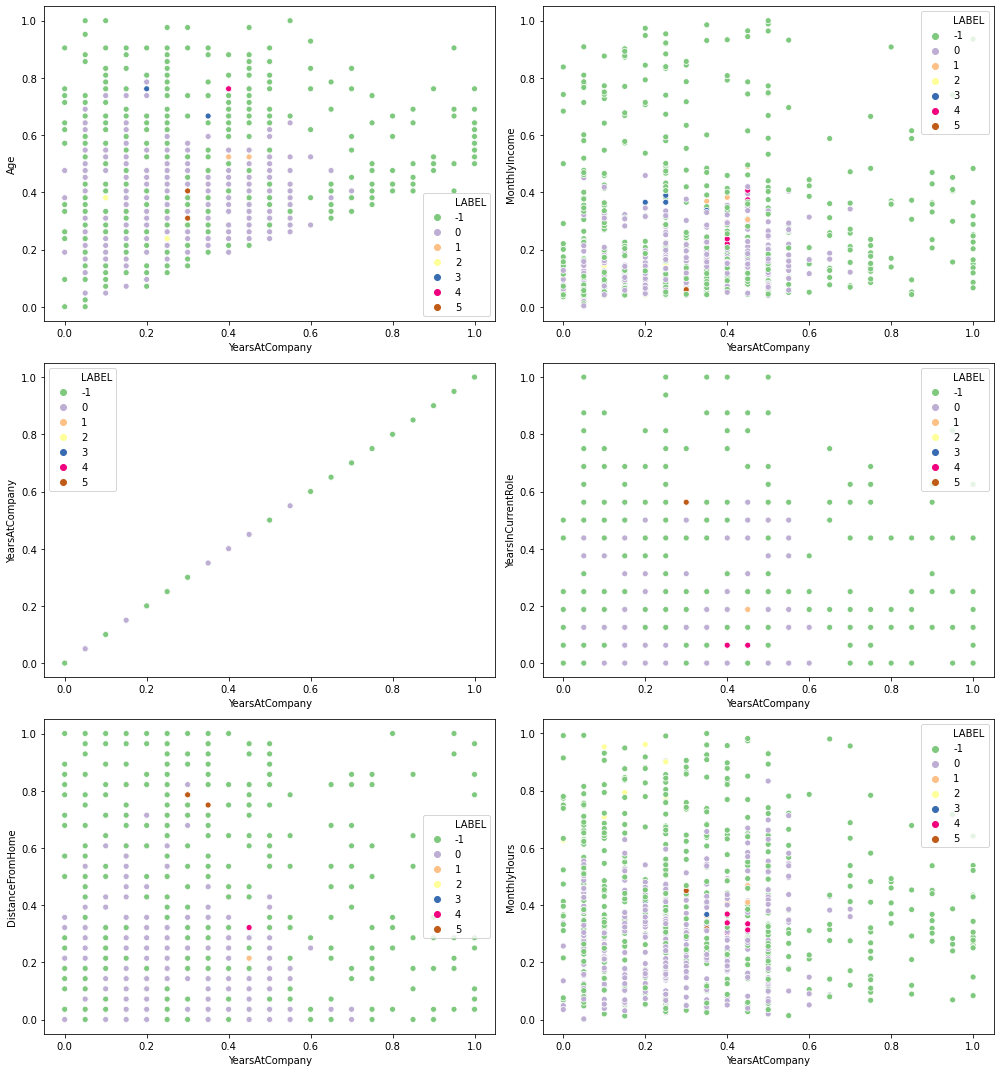

In [45]:
fig, ((ax1, ax2), (ax3, ax4),( ax5, ax6)) = plt.subplots(3, 2, figsize = (14,15))

sns.scatterplot(x = "YearsAtCompany", y = "MonthlyHours", data = df, hue = "LABEL", palette = "Accent", ax = ax6)
sns.scatterplot(x = "YearsAtCompany", y = "MonthlyIncome", data = df, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "YearsAtCompany", y = "YearsAtCompany", data = df, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "YearsAtCompany", y = "YearsInCurrentRole", data = df, hue = "LABEL", palette = "Accent", ax = ax4)
sns.scatterplot(x = "YearsAtCompany", y = "DistanceFromHome", data = df, hue = "LABEL", palette = "Accent", ax = ax5)
sns.scatterplot(x = "YearsAtCompany", y = "Age", data = df, hue = "LABEL", palette = "Accent", ax = ax1)

plt.tight_layout()
plt.show()

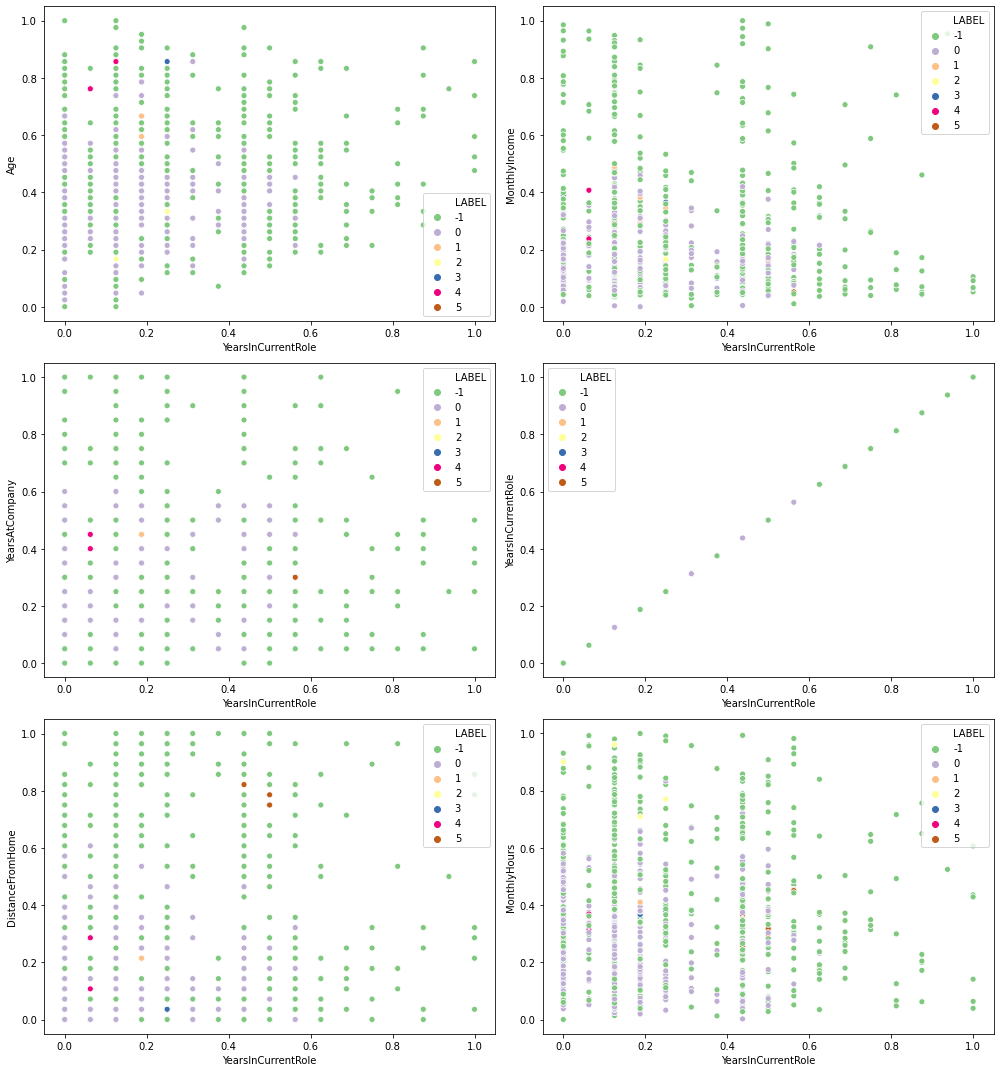

In [46]:
fig, ((ax1, ax2), (ax3, ax4),( ax5, ax6)) = plt.subplots(3, 2, figsize = (14,15))

sns.scatterplot(x = "YearsInCurrentRole", y = "MonthlyHours", data = df, hue = "LABEL", palette = "Accent", ax = ax6)
sns.scatterplot(x = "YearsInCurrentRole", y = "MonthlyIncome", data = df, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "YearsInCurrentRole", y = "YearsAtCompany", data = df, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "YearsInCurrentRole", y = "YearsInCurrentRole", data = df, hue = "LABEL", palette = "Accent", ax = ax4)
sns.scatterplot(x = "YearsInCurrentRole", y = "DistanceFromHome", data = df, hue = "LABEL", palette = "Accent", ax = ax5)
sns.scatterplot(x = "YearsInCurrentRole", y = "Age", data = df, hue = "LABEL", palette = "Accent", ax = ax1)

plt.tight_layout()
plt.show()

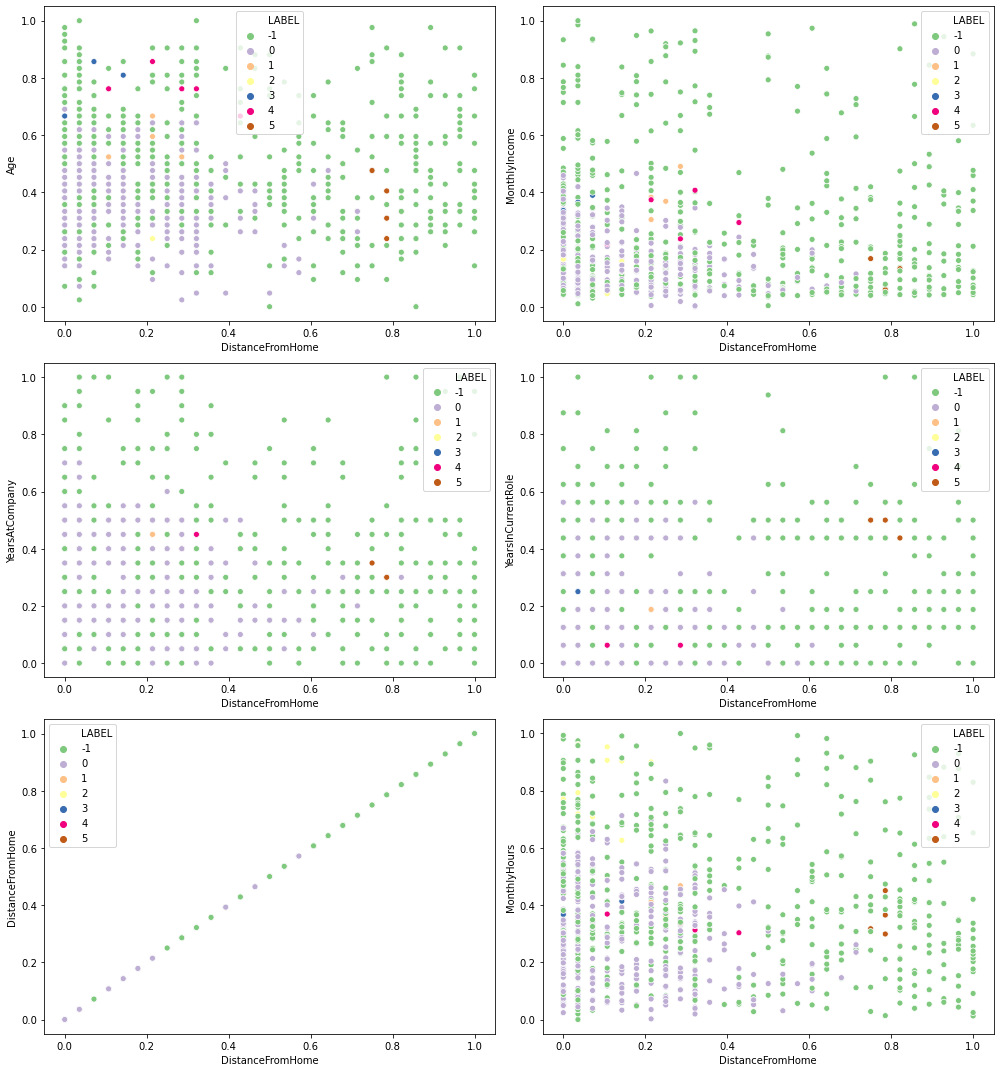

In [47]:
fig, ((ax1, ax2), (ax3, ax4),( ax5, ax6)) = plt.subplots(3, 2, figsize = (14,15))

sns.scatterplot(x = "DistanceFromHome", y = "MonthlyHours", data = df, hue = "LABEL", palette = "Accent", ax = ax6)
sns.scatterplot(x = "DistanceFromHome", y = "MonthlyIncome", data = df, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "DistanceFromHome", y = "YearsAtCompany", data = df, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "DistanceFromHome", y = "YearsInCurrentRole", data = df, hue = "LABEL", palette = "Accent", ax = ax4)
sns.scatterplot(x = "DistanceFromHome", y = "DistanceFromHome", data = df, hue = "LABEL", palette = "Accent", ax = ax5)
sns.scatterplot(x = "DistanceFromHome", y = "Age", data = df, hue = "LABEL", palette = "Accent", ax = ax1)

plt.tight_layout()
plt.show()

Pairplot totale


C:\Users\jigok\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


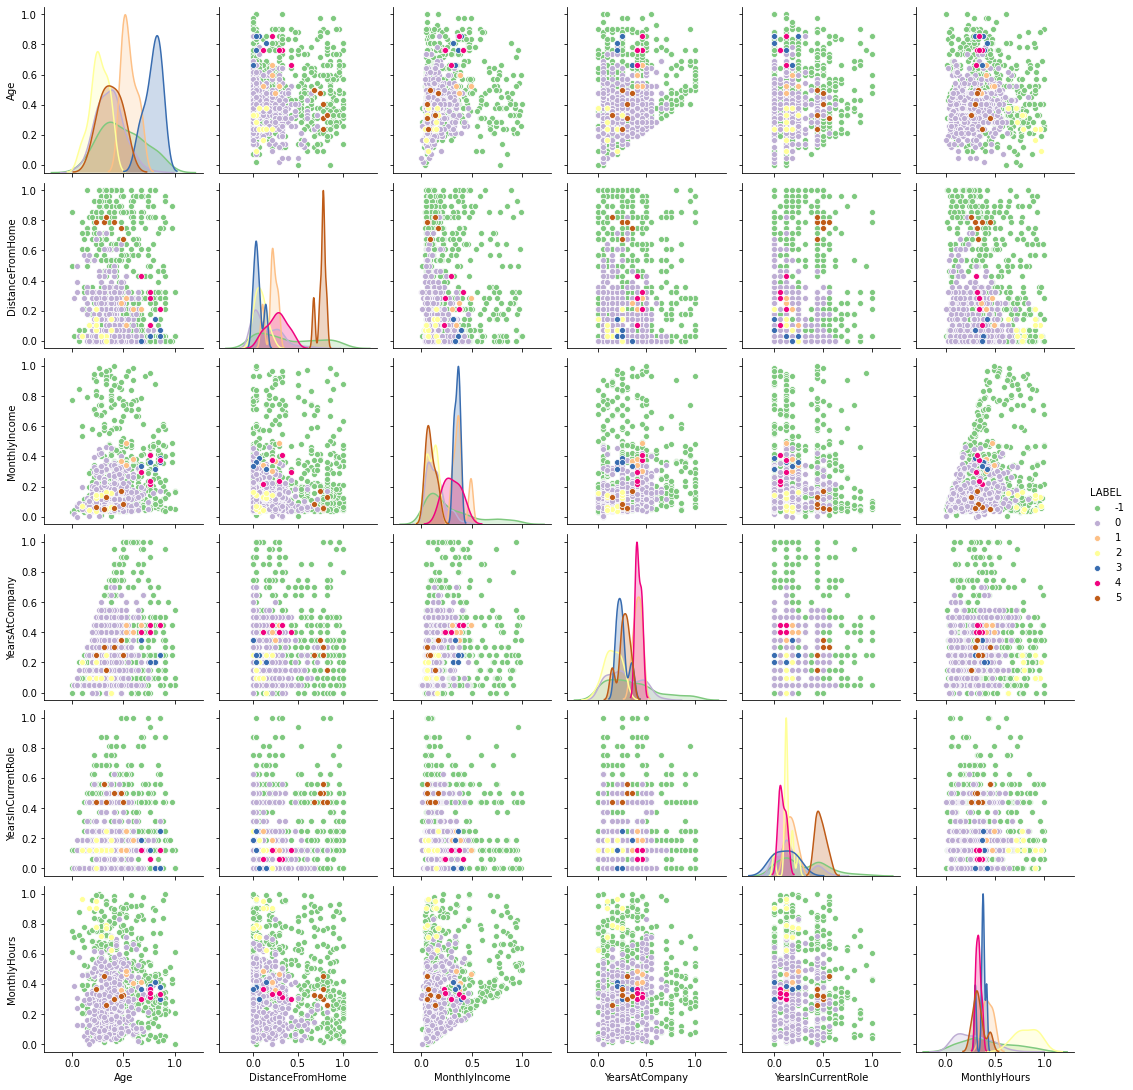

In [48]:
sns.pairplot(df, hue = "LABEL", palette = "Accent")
plt.show()

Ora determino l'Esp e il MinSamples facendo il grafico ed utilizzando la distanza euclidea come paramentro

In [49]:
dist = pdist(df,'euclidean')
dist = squareform(dist)
print(dist)

[[0.         1.17153174 0.9487193  ... 1.13890308 1.20728327 0.39001561]
 [1.17153174 0.         1.2862625  ... 0.57657188 0.42817767 1.15096609]
 [0.9487193  1.2862625  0.         ... 1.23524217 1.20510838 0.90934839]
 ...
 [1.13890308 0.57657188 1.23524217 ... 0.         0.5348372  1.06963704]
 [1.20728327 0.42817767 1.20510838 ... 0.5348372  0.         1.10738331]
 [0.39001561 1.15096609 0.90934839 ... 1.06963704 1.10738331 0.        ]]


In [50]:
k = 5
kth_distance =[]
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distance.append(d[index_kth_distance])

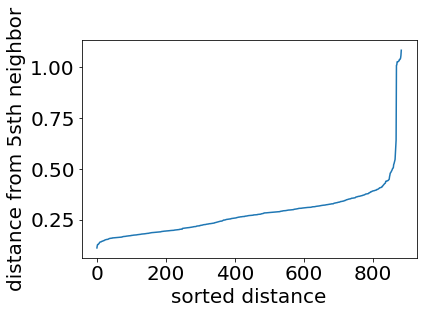

In [51]:
plt.plot(range(0,len(kth_distance)), sorted(kth_distance))
plt.ylabel('distance from 5sth neighbor',fontsize = 20)
plt.xlabel('sorted distance',fontsize = 20)

plt.tick_params(axis ='both', labelsize =20)

Il miglior modo per valutare le performance di un modello è osservare come cambiano le metriche al variare dei suoi iperparametri. Definiamo il set di iperparametri da provare:

In [52]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 1.5, 0.1)]
min_samples_to_test = range(5, 50, 5)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]
MIN_SAMPLES: [5, 10, 15, 20, 25, 30, 35, 40, 45]


Dato che il DBSCAN si preoccupa poco della forma del cluster l'utilizzo di una metrica come l'indice di Silhouette sarebbe inappropriato. Proprio per questo motivo possiamo provare a creare un paio di metriche home-made vedere come va la clusterizzazione con la combinazione di iperparametri imposti.

Verrà eseguita prima la clusterizzazione e poi il calcolo delle metriche. Ad esempio potremmo utilizzare:

Distanza media tra i noise points e i 6 punti più vicini (6-NN) Numero di cluster che vengono individuati Scriviamo quanto detto all'interno della funzione get_metric() che, una volta all'interno del grid search, si occuperà di restituire automaticamente le metriche ad ogni combinazione di iperparametri:

In [53]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan.labels_[dbscan.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)

Istanziamo i due dataframe che conterranno i risultati del grid search:

In [54]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [55]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, df, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 0.235    0
  2 | Tested with eps = 0.1 and min_samples =  10 | 0.235    0
  3 | Tested with eps = 0.1 and min_samples =  15 | 0.235    0
  4 | Tested with eps = 0.1 and min_samples =  20 | 0.235    0
  5 | Tested with eps = 0.1 and min_samples =  25 | 0.235    0
  6 | Tested with eps = 0.1 and min_samples =  30 | 0.235    0
  7 | Tested with eps = 0.1 and min_samples =  35 | 0.235    0
  8 | Tested with eps = 0.1 and min_samples =  40 | 0.235    0
  9 | Tested with eps = 0.1 and min_samples =  45 | 0.235    0
 10 | Tested with eps = 0.2 and min_samples =   5 | 0.281    6
 11 | Tested with eps = 0.2 and min_samples =  10 | 0.265    4
 12 | Tested with eps = 0.2 and min_samples =  15 | 0.253    1
 13 | Tested with eps = 0.2 and min_samples =  20 | 0.242    1
 14 | Tested with eps = 0.2 and min_samples =  25

Mostriamo i risultati del grid search appena eseguito per cercare la "miglior" combinazione di iperparametri:

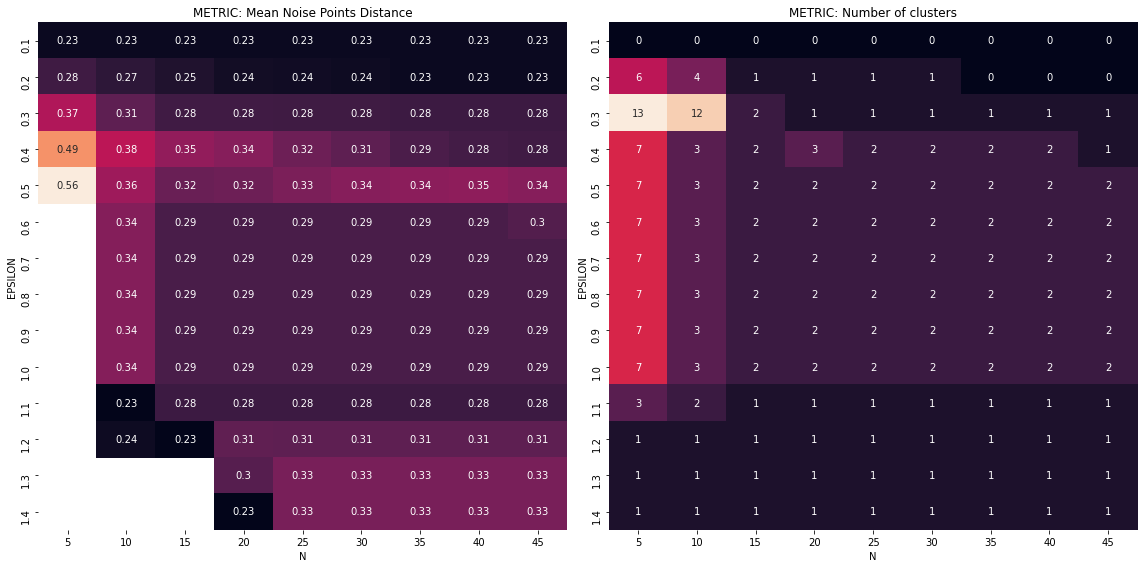

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

Analizzando le due heatmap ci accorgiamo subito che per bassi valori di ε praticamente tutti i punti vengono identificati come noise points (0 cluster). Viceversa, per alti valori di ε tendiamo ad avere un solo cluster.

Probabilmente, sul nostro dataset di partenza ha senso trovare non più di 13 cluster.

Scegliamo allora n=5 ed ε=0.3 che ci restituiscono mediamente dei noise points più distanti.

E adesso vediamo come performa questo "miglior" modello:

In [69]:
# Istantiating with eps = 1 and min_samples = 15 (best model)
best_dbscan_model = DBSCAN( eps = 0.3, min_samples = 5)

# Fitting
best_dbscan_model.fit(df)

# Extracting labels
df["LABEL"] = best_dbscan_model.labels_

# Number of clusters in labels, ignoring noise if present.

labels = best_dbscan_model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 13
Estimated number of noise points: 96


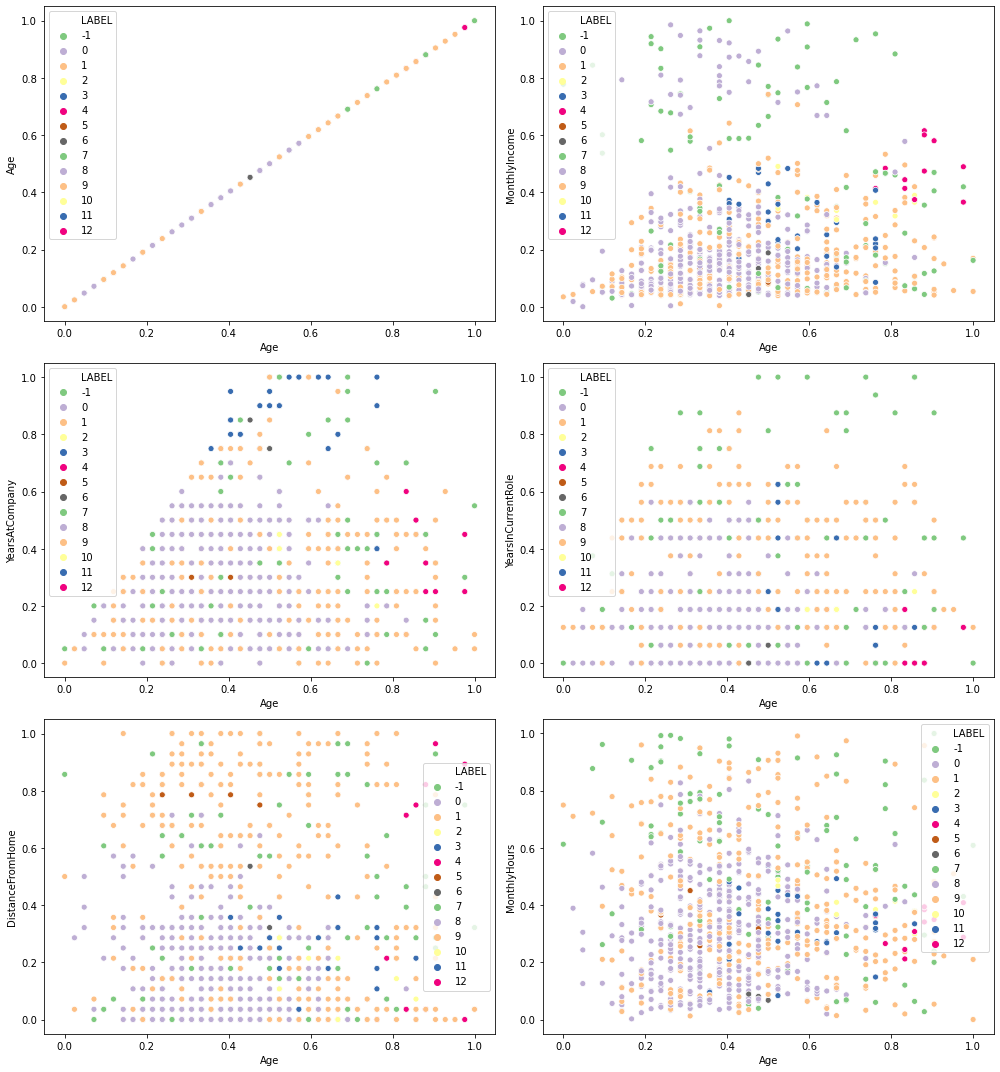

In [70]:
fig, ((ax1, ax2), (ax3, ax4),( ax5, ax6)) = plt.subplots(3, 2, figsize = (14,15))

sns.scatterplot(x = "Age", y = "MonthlyHours", data = df, hue = "LABEL", palette = "Accent", ax = ax6)
sns.scatterplot(x = "Age", y = "MonthlyIncome", data = df, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "Age", y = "YearsAtCompany", data = df, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "Age", y = "YearsInCurrentRole", data = df, hue = "LABEL", palette = "Accent", ax = ax4)
sns.scatterplot(x = "Age", y = "DistanceFromHome", data = df, hue = "LABEL", palette = "Accent", ax = ax5)
sns.scatterplot(x = "Age", y = "Age", data = df, hue = "LABEL", palette = "Accent", ax = ax1)

plt.tight_layout()
plt.show()

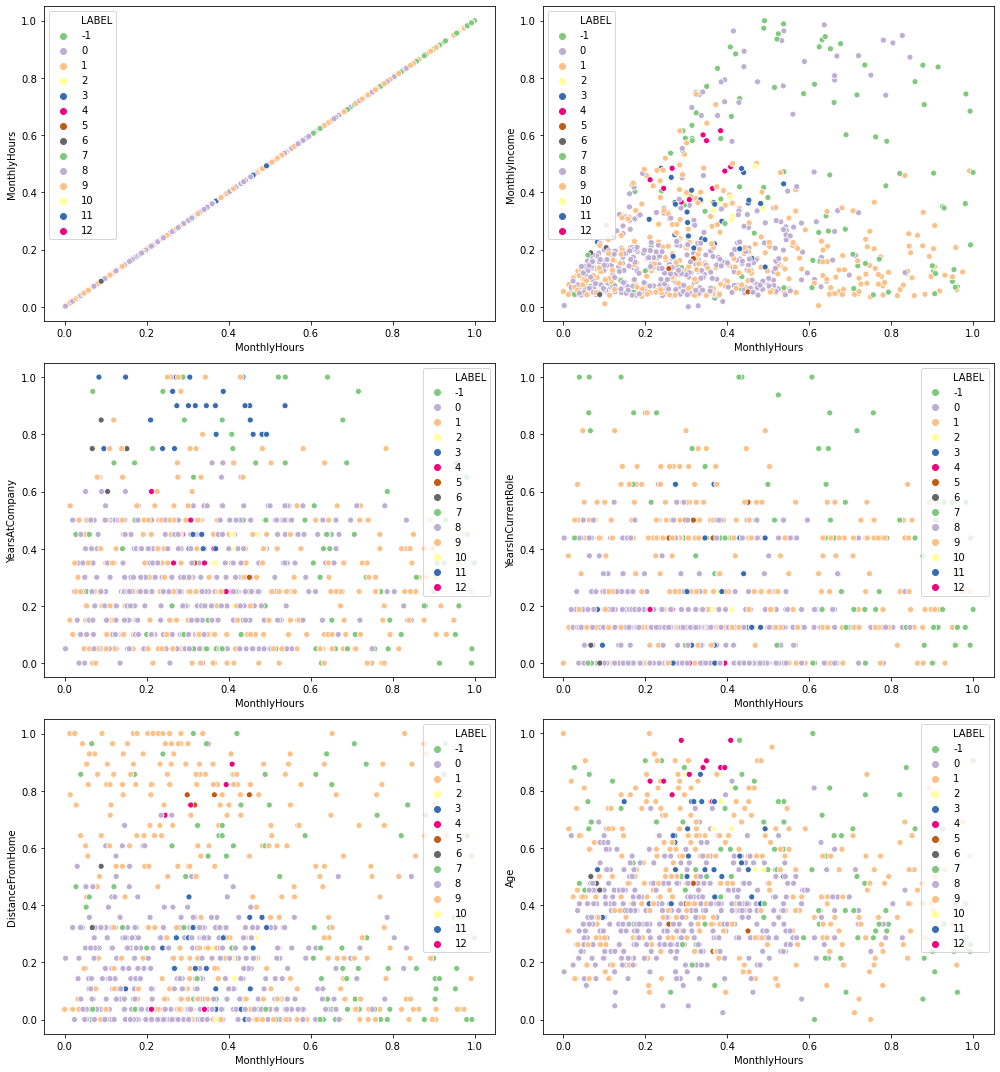

In [71]:
fig, ((ax1, ax2), (ax3, ax4),( ax5, ax6)) = plt.subplots(3, 2, figsize = (14,15))

sns.scatterplot(x = "MonthlyHours", y = "MonthlyHours", data = df, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "MonthlyHours", y = "MonthlyIncome", data = df, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "MonthlyHours", y = "YearsAtCompany", data = df, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "MonthlyHours", y = "YearsInCurrentRole", data = df, hue = "LABEL", palette = "Accent", ax = ax4)
sns.scatterplot(x = "MonthlyHours", y = "DistanceFromHome", data = df, hue = "LABEL", palette = "Accent", ax = ax5)
sns.scatterplot(x = "MonthlyHours", y = "Age", data = df, hue = "LABEL", palette = "Accent", ax = ax6)

plt.tight_layout()
plt.show()

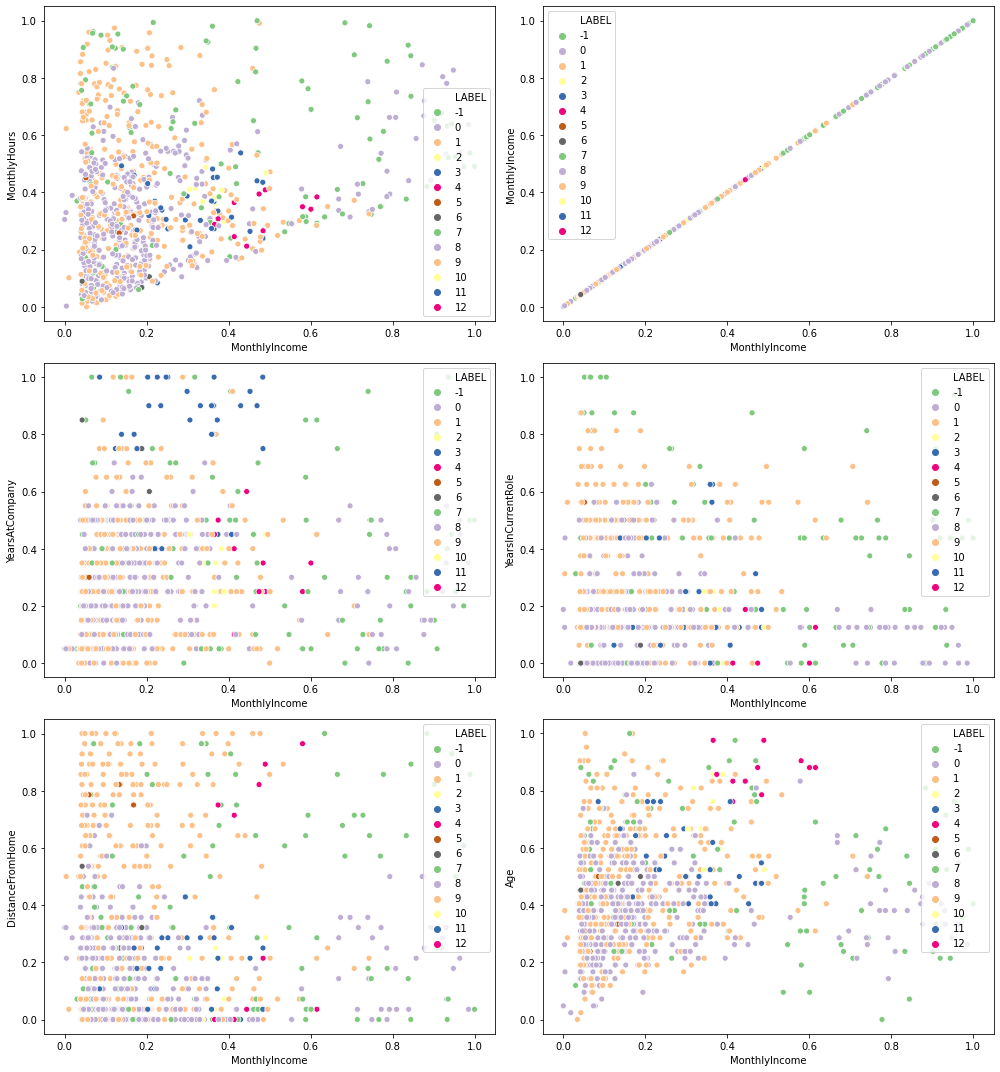

In [72]:
fig, ((ax1, ax2), (ax3, ax4),( ax5, ax6)) = plt.subplots(3, 2, figsize = (14,15))

sns.scatterplot(x = "MonthlyIncome", y = "MonthlyHours", data = df, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "MonthlyIncome", y = "MonthlyIncome", data = df, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "MonthlyIncome", y = "YearsAtCompany",data = df, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "MonthlyIncome", y = "YearsInCurrentRole", data =df, hue = "LABEL", palette = "Accent", ax = ax4)
sns.scatterplot(x = "MonthlyIncome", y = "DistanceFromHome", data = df, hue = "LABEL", palette = "Accent", ax = ax5)
sns.scatterplot(x = "MonthlyIncome", y = "Age", data = df, hue = "LABEL", palette = "Accent", ax = ax6)

plt.tight_layout()
plt.show()

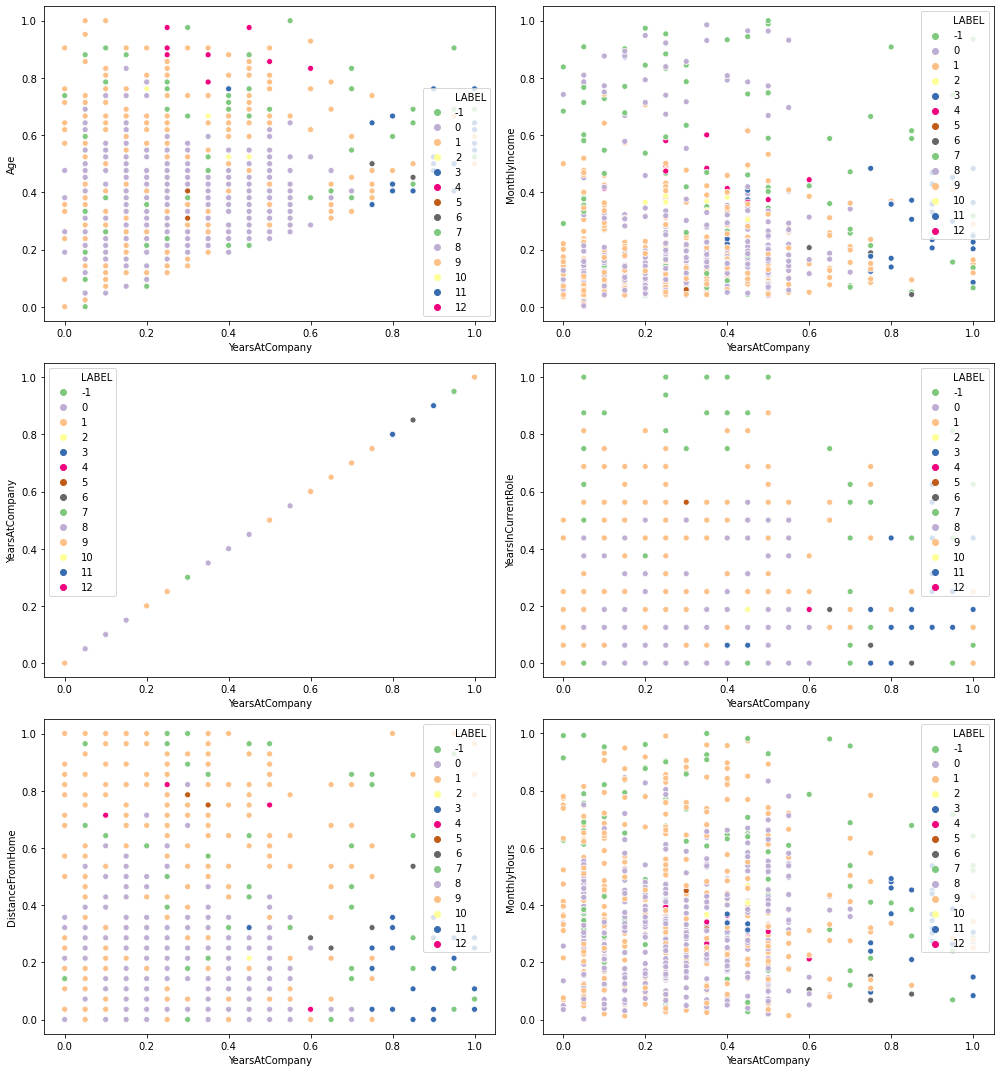

In [73]:
fig, ((ax1, ax2), (ax3, ax4),( ax5, ax6)) = plt.subplots(3, 2, figsize = (14,15))

sns.scatterplot(x = "YearsAtCompany", y = "MonthlyHours", data = df, hue = "LABEL", palette = "Accent", ax = ax6)
sns.scatterplot(x = "YearsAtCompany", y = "MonthlyIncome", data = df, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "YearsAtCompany", y = "YearsAtCompany", data = df, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "YearsAtCompany", y = "YearsInCurrentRole", data = df, hue = "LABEL", palette = "Accent", ax = ax4)
sns.scatterplot(x = "YearsAtCompany", y = "DistanceFromHome", data = df, hue = "LABEL", palette = "Accent", ax = ax5)
sns.scatterplot(x = "YearsAtCompany", y = "Age", data = df, hue = "LABEL", palette = "Accent", ax = ax1)

plt.tight_layout()
plt.show()

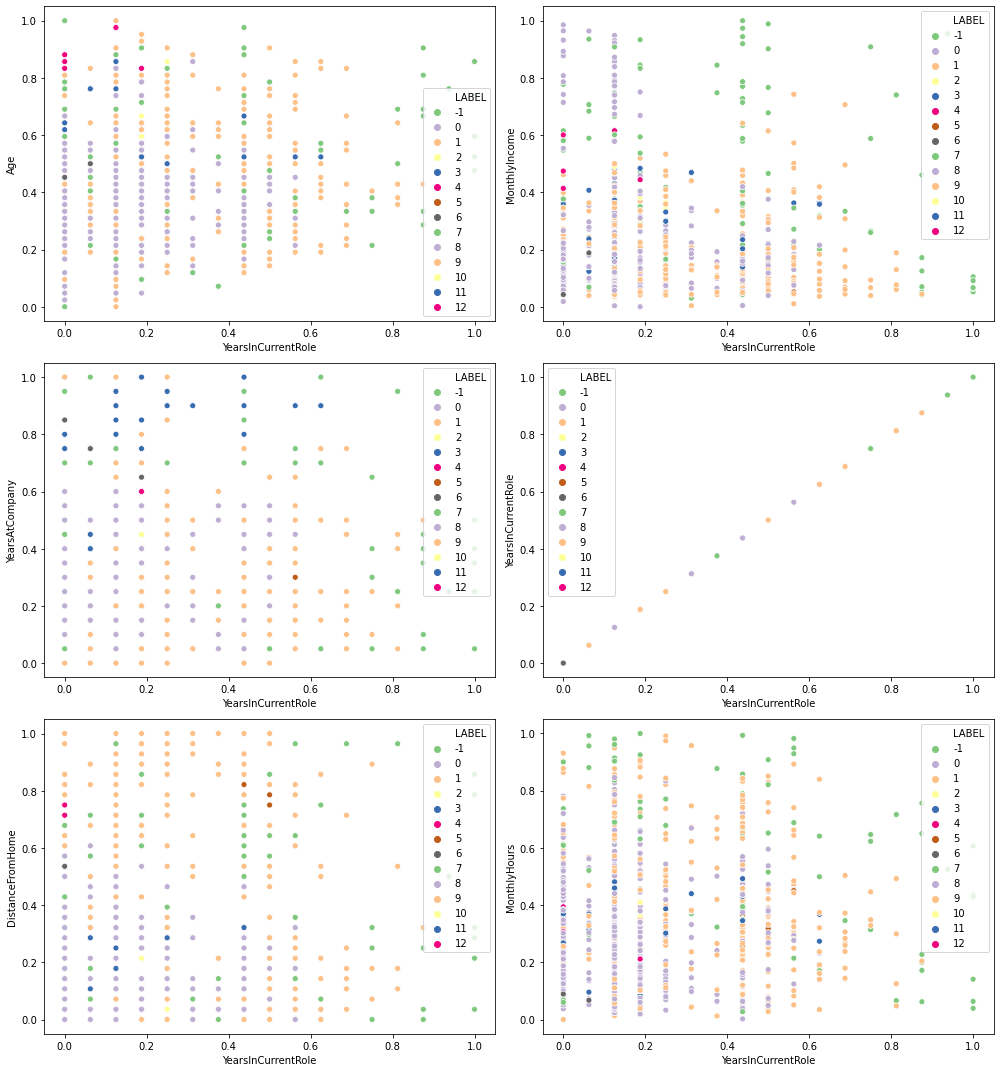

In [74]:
fig, ((ax1, ax2), (ax3, ax4),( ax5, ax6)) = plt.subplots(3, 2, figsize = (14,15))

sns.scatterplot(x = "YearsInCurrentRole", y = "MonthlyHours", data = df, hue = "LABEL", palette = "Accent", ax = ax6)
sns.scatterplot(x = "YearsInCurrentRole", y = "MonthlyIncome", data = df, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "YearsInCurrentRole", y = "YearsAtCompany", data = df, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "YearsInCurrentRole", y = "YearsInCurrentRole", data = df, hue = "LABEL", palette = "Accent", ax = ax4)
sns.scatterplot(x = "YearsInCurrentRole", y = "DistanceFromHome", data = df, hue = "LABEL", palette = "Accent", ax = ax5)
sns.scatterplot(x = "YearsInCurrentRole", y = "Age", data = df, hue = "LABEL", palette = "Accent", ax = ax1)

plt.tight_layout()
plt.show()

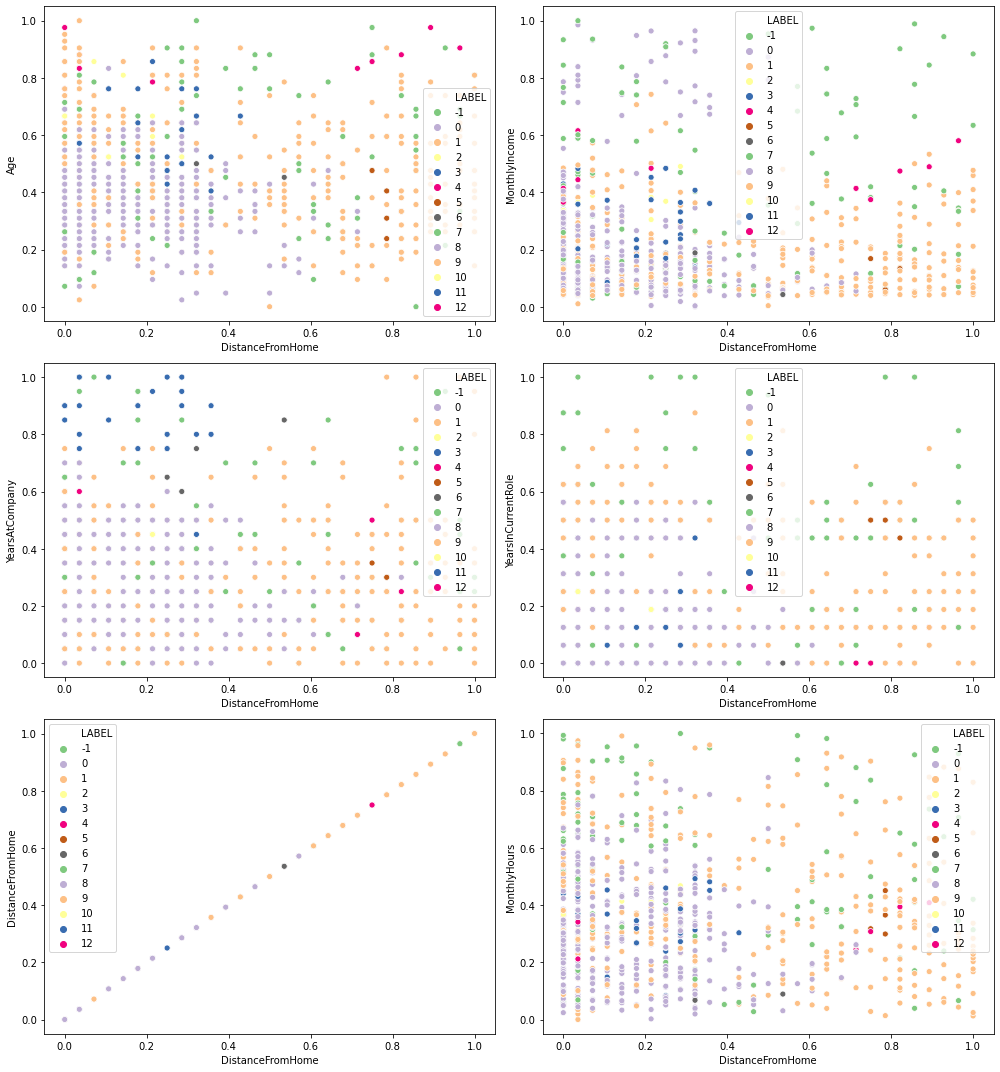

In [76]:
fig, ((ax1, ax2), (ax3, ax4),( ax5, ax6)) = plt.subplots(3, 2, figsize = (14,15))

sns.scatterplot(x = "DistanceFromHome", y = "MonthlyHours", data = df, hue = "LABEL", palette = "Accent", ax = ax6)
sns.scatterplot(x = "DistanceFromHome", y = "MonthlyIncome", data = df, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "DistanceFromHome", y = "YearsAtCompany", data = df, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "DistanceFromHome", y = "YearsInCurrentRole", data = df, hue = "LABEL", palette = "Accent", ax = ax4)
sns.scatterplot(x = "DistanceFromHome", y = "DistanceFromHome", data = df, hue = "LABEL", palette = "Accent", ax = ax5)
sns.scatterplot(x = "DistanceFromHome", y = "Age", data = df, hue = "LABEL", palette = "Accent", ax = ax1)

plt.tight_layout()
plt.show()

C:\Users\jigok\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jigok\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


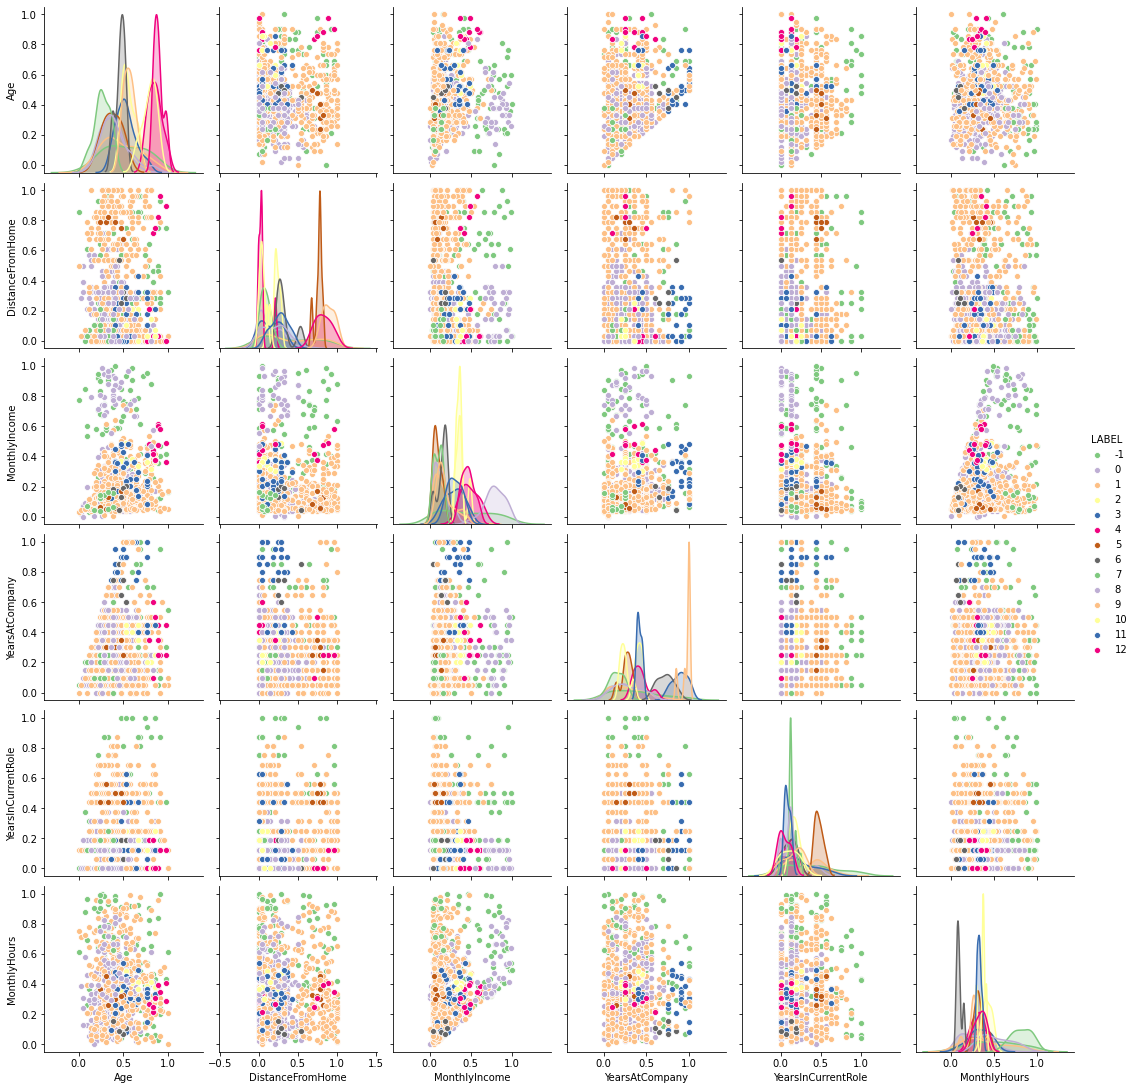

In [77]:
sns.pairplot(df, hue = "LABEL", palette = "Accent")
plt.show()